# Regularized Linear Regression Exercise

**In this exercise you will:**
- Extend your Linear Regression model to produce non-linear regression lines/curve (sometimes referred to as Polynomial Regression)
- Include Regularization to reduce over-fitting (more specifically implement Ridge Regression)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import math

plt.style.use('ggplot')

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


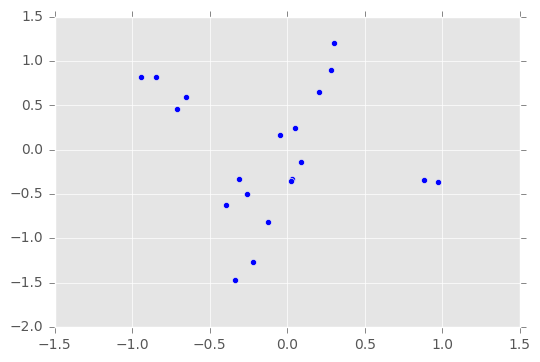

In [37]:
# Generate some sample data points
pts = 20
over_x = np.expand_dims(np.random.uniform(-1.0,1.0, pts),1)
over_y = np.sin(6*over_x) + np.random.randn(pts,1)*0.5

plt.scatter(over_x,over_y)

**(1.)** Open `regularized_regression.py` and copy your previous solutions for `initialize_weights`, `train`, and `loss` from the linear regression exercise 

**(2.)** Implement `poly_feature_transform`. Not only does it append a vector of ones for the bias term, it also introduces higher order polynomial terms depending on the parameter `poly_order`.

In [38]:
from regularized_regression import RegularizedRegression

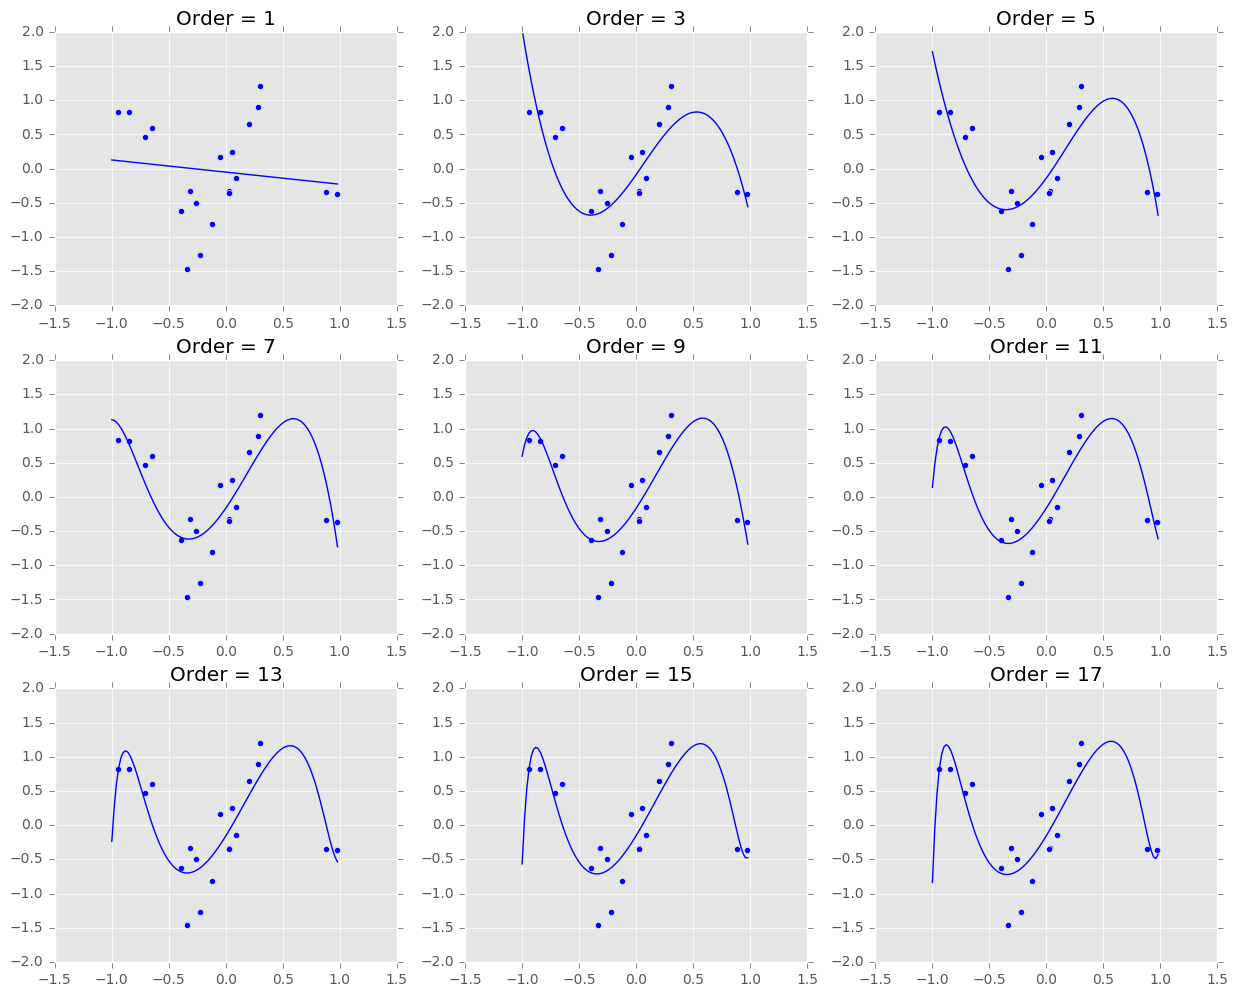

In [39]:
regressor = RegularizedRegression()

plt.figure(figsize=(15,12))
for i in range(9):
    order = 2*i + 1
    regressor.train(over_x,over_y,poly_order=order,reg=0,batch_size=20,num_iters=3000, learning_rate=1e-1)

    X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
    y_range = regressor.predict(X_range,poly_order=order)
    plt.subplot(3,3,i+1)
    plt.scatter(over_x,over_y)
    plt.plot(X_range,y_range, "b")
    plt.ylim(-2,2)
    plt.title("Order = " + str(order))

As the order of our hypothesis function increases, we are able to generate more complex functions and get a better fit of our dataset. However, our data is inherently noisy and more complex functions fit noise better as well. 

To prevent overfitting, we add a regularization term in our loss function that penalizes large weights. 

**(3.)** Modify the analytical solution under the `train` function to include $\ell_2$ regularization.

Hint: $(X^TX)^{-1} => (X^TX + \lambda I)^{-1}$ where $\lambda$ is the regularization coefficient that controls how much you penalize large weights.

**(4.)** Modify the functions `train` and `loss` to include the regularization term for the iterative / gradient descent solution.

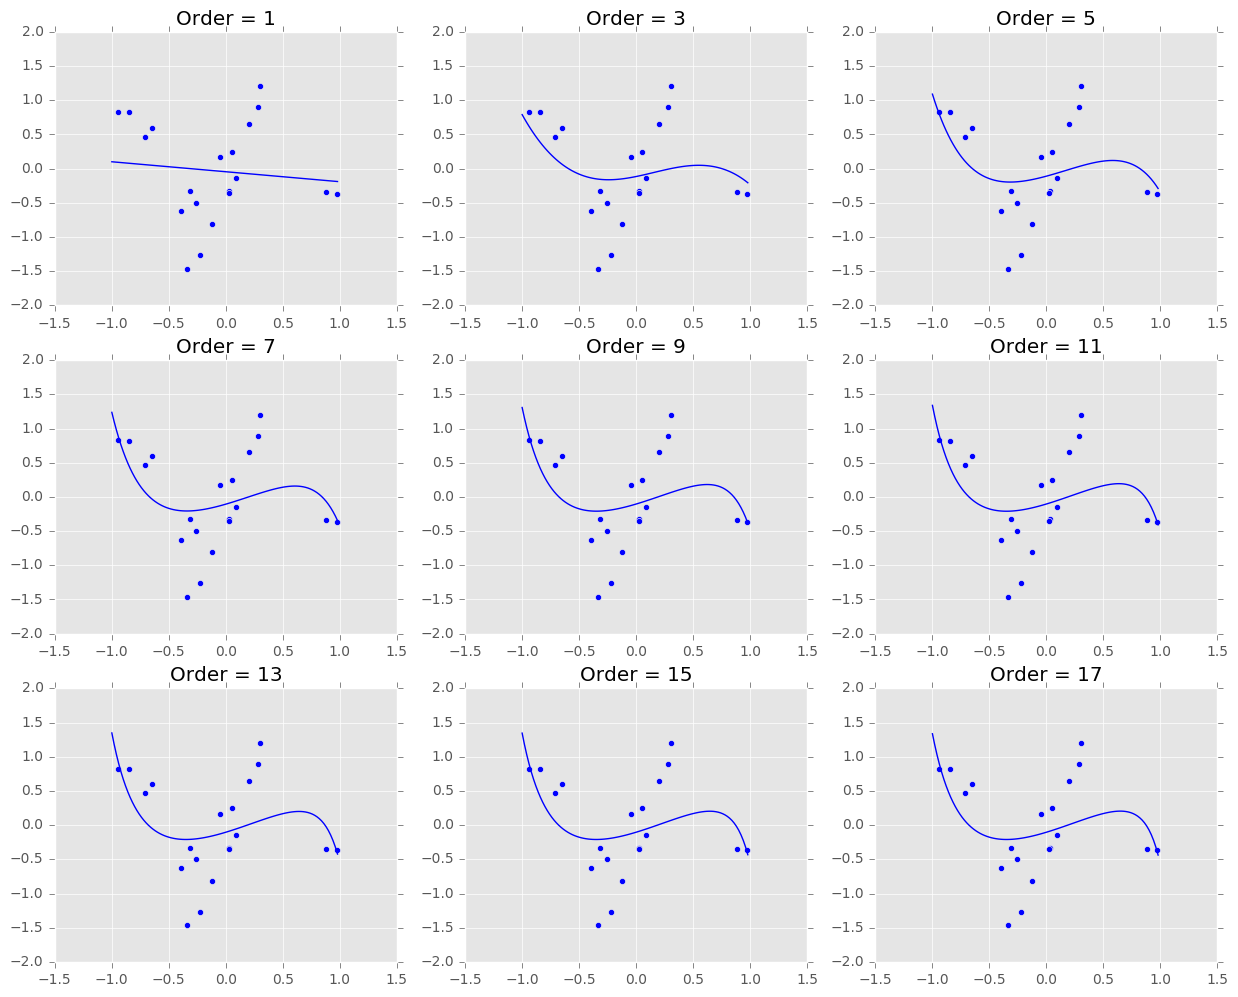

In [45]:
regressor = RegularizedRegression()

plt.figure(figsize=(15,12))
for i in range(9):
    order = 2*i + 1
    regressor.train(over_x,over_y,poly_order=order,reg=0.05,batch_size=20,learning_rate=1e-1,num_iters=3000)

    X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
    y_range = regressor.predict(X_range,poly_order=order)
    plt.subplot(3,3,i+1)
    plt.scatter(over_x,over_y)
    plt.plot(X_range,y_range, "b")
    plt.ylim(-2,2)
    plt.title("Order = " + str(order))

What happens if we have more data?

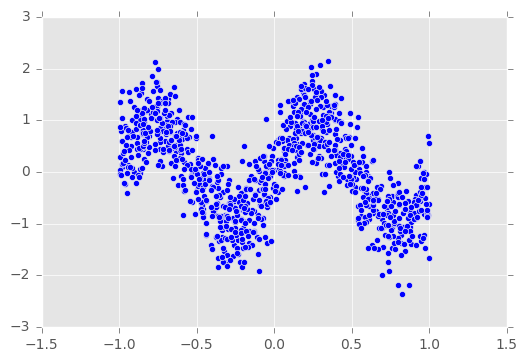

In [47]:
pts = 1000
over_x = np.expand_dims(np.random.uniform(-1.0,1.0, pts),1)
over_y = np.sin(6*over_x) + np.random.randn(pts,1)*0.5

plt.scatter(over_x,over_y)

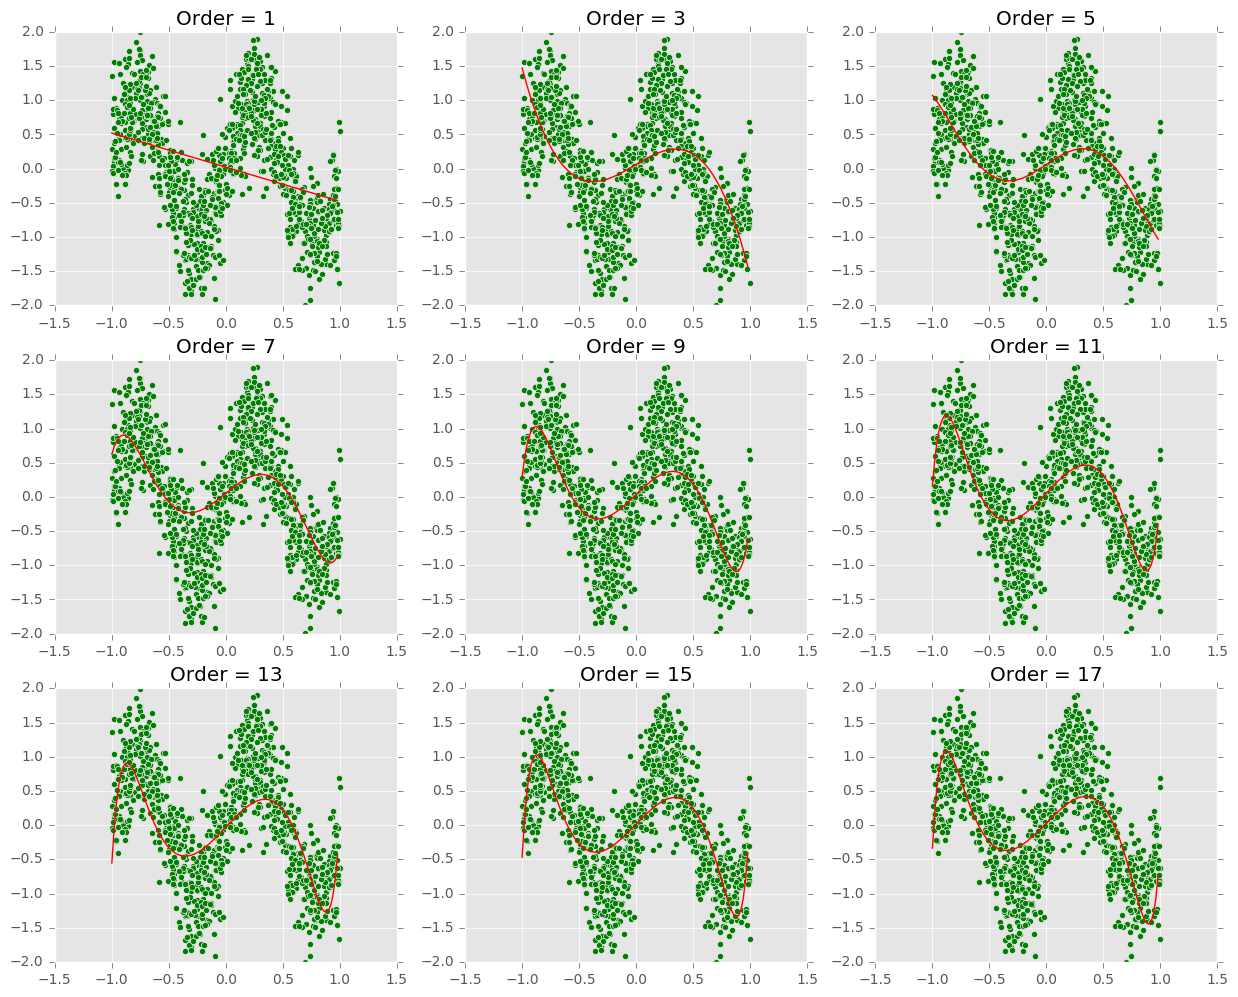

In [53]:
regressor = RegularizedRegression()

plt.figure(figsize=(15,12))
for i in range(9):
    order = 2*i + 1
    regressor.train(over_x,over_y,poly_order=order,reg=0,batch_size=20,learning_rate=1e-1,num_iters=3000)

    X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
    y_range = regressor.predict(X_range,poly_order=order)
    plt.subplot(3,3,i+1)
    plt.scatter(over_x,over_y,c="green")
    plt.plot(X_range,y_range,"red")
    plt.ylim(-2,2)
    plt.title("Order = " + str(order))

In [49]:
plt.scatter?

As you can see, even without regularization, the more data we have our model is more consistent and less likely to overfit. This suggests that overfitting is relative to the complexity of the hypothesis function as well as the number of data points in your training set.